# Testing Covariance Ellipsoid Plottting

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from covariance_ellipsoid import *

### Test on 2D data

In [4]:
# Generate test data points
num_points = 334
bias = np.asarray([10.,10.]) # change this to add bias to data
s = np.asarray([2,2]).reshape([2,1]) # change values of s to modify data spread
x = np.random.randn(num_points)
data = np.random.standard_normal([2,num_points])+s*x.reshape([1,-1]) + bias.reshape([-1,1])

In [5]:
# compute mean and covariance of data
mean, cov = get_mean_and_covariance_matrix(data)

(3.1578013759683174, 15.945262967501868, 3.464089990199101, 16.183019981861378)

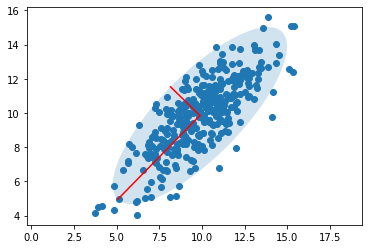

In [6]:
# plot covariance ellipse around mean with specified confidence level
confidence = 0.95 # choose confidence level for ellipse
ax=plot_covariance_ellipsoid(mean, cov, confidence=confidence, datapoints=data)
plt.axis("equal")

(3.1578013759683174, 15.945262967501868, 3.464089990199101, 16.183019981861378)

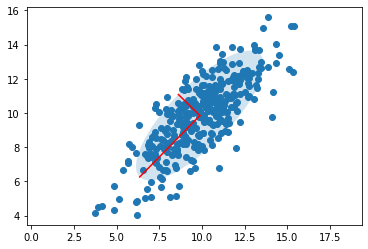

In [7]:
# plot covariance ellipse around mean with different confidence level
confidence = 0.8 # choose confidence level for ellipse
ax=plot_covariance_ellipsoid(mean, cov, confidence=confidence, datapoints=data)
plt.axis("equal")

#### Find if points lie within a confidence ellipse

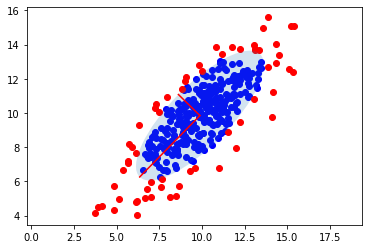

In [8]:
# Find points within a confidence ellipse

in_points = []
out_points = []
confidence = 0.8
ax = plot_covariance_ellipsoid(mean, cov, confidence)

for i in range(data.shape[1]):
    # print data[:,i]
    if point_is_in_covariance_ellipsoid(data[:,i], mean, cov, confidence):
        in_points.append(data[:,i].flatten())
        # print "dataes"
    else:
        out_points.append(data[:,i].flatten())
        
in_points = np.asarray(in_points)
out_points = np.asarray(out_points)

if in_points.shape[0]>1:
    ax.scatter(*[in_points[:,d] for d in range(data.shape[0])],c='b')
if out_points.shape[0]>1:
    ax.scatter(*[out_points[:,d] for d in range(data.shape[0])],c='r')
try:
    ax.axis("equal")
except NotImplementedError:
    ax.axis("auto")

### Test on 3D data

In [9]:
# Generate 3D data points
num_points = 334
bias = np.asarray([10.,10.,10.]) # change this to add bias to data
s = np.asarray([2,2,2]).reshape([3,1]) # change values of s to modify data spread
x = np.random.randn(num_points)
data = np.random.standard_normal([3,num_points])+s*x.reshape([1,-1]) + bias.reshape([-1,1])

In [10]:
# compute mean and covariance of data
mean, cov = get_mean_and_covariance_matrix(data)

(3.240025477239291, 17.997651508603138, 2.9257656856813368, 17.307614840424108)

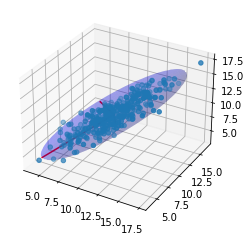

In [11]:
# plot covariance ellipsoid around mean with specified confidence level
confidence = 0.95 # choose confidence level for ellipse
ax=plot_covariance_ellipsoid(mean, cov, confidence=confidence, datapoints=data)
plt.axis("auto")

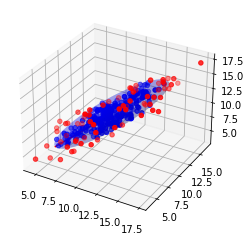

In [12]:
# Find points within a confidence ellipse

in_points = []
out_points = []
confidence = 0.8
ax = plot_covariance_ellipsoid(mean, cov, confidence)

for i in range(data.shape[1]):
    # print data[:,i]
    if point_is_in_covariance_ellipsoid(data[:,i], mean, cov, confidence):
        in_points.append(data[:,i].flatten())
        # print "dataes"
    else:
        out_points.append(data[:,i].flatten())
        
in_points = np.asarray(in_points)
out_points = np.asarray(out_points)

if in_points.shape[0]>1:
    ax.scatter(*[in_points[:,d] for d in range(data.shape[0])],c='b')
if out_points.shape[0]>1:
    ax.scatter(*[out_points[:,d] for d in range(data.shape[0])],c='r')
try:
    ax.axis("equal")
except NotImplementedError:
    ax.axis("auto")